<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/07-Machine%20Learning/Compute_AUC_ROC_from_scratch_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import trapz
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [27]:
lbls = [1, 1, 0, 0]
scores = [0.9, 0.7, 0.6, 0.3]
num_points =5
thresholds =(np.arange(0, 1.01, 1.0/(num_points-1))).tolist()

In [28]:
thresholds

[0.0, 0.25, 0.5, 0.75, 1.0]

In [11]:
def perf_metrics(y_actual, y_hat,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)): 
        if(y_hat[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
    
    #We find the True positive rate and False positive rate based on the threshold
            
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]

In [17]:
fpr,tpr =perf_metrics(lbls,scores,0.5)

In [18]:
print('Sensitivity: {} ,'.format(round(tpr,2)),'Specificity: {}'.format(round(1-fpr,2)))

Sensitivity: 1.0 , Specificity: 0.5


In [29]:
roc_points = []
for threshold in thresholds:
    rates = perf_metrics(lbls, scores, threshold)
    roc_points.append(rates)

In [30]:
fpr_array = []
tpr_array = []
for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])

In [31]:
#We use Trapezoidal rule to calculate the area under the curve and approximating the intergral  
auc = sum(np.trapz(tpr_array,fpr_array))+1
print('Area under curve={}'.format(auc))

Area under curve=0.875


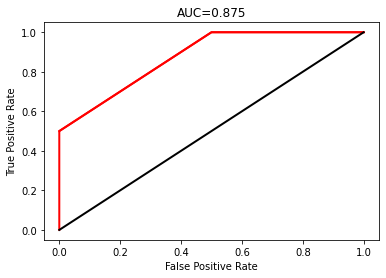

In [32]:
plt.plot(tpr_array,fpr_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={}'.format(round(auc,3)))
plt.show()